In [1]:
N_CLUSTERS = 15
DURATION_PER_FRAME = 100

FINAL_FRAME_REPEAT = 5
BOOMERANG = True
RESIZE_FACTOR = 0.5
LOOP_COUNT = 0

IMAGE_PATH = '../../Test_Images/Img_09.jpg'
OUTPUT_IMAGE_PATH = 'Results/Images/Img_09.jpg'
OUTPUT_GIF_PATH = 'Results/GIFs/Img_09.gif'

RANDOM_STATE = 7

In [2]:
total_frames = 1 + N_CLUSTERS + FINAL_FRAME_REPEAT + (BOOMERANG * (N_CLUSTERS - 1))
total_duration = (total_frames * DURATION_PER_FRAME)/1000
print(f"Total number of frames in the GIF: {total_frames}")
print(f"Total duration of the GIF: {total_duration}s")

Total number of frames in the GIF: 35
Total duration of the GIF: 3.5s


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import IPython.display as display

In [4]:
display.Image(url = IMAGE_PATH, height = 500)

In [5]:
image = Image.open(IMAGE_PATH)
image = np.asarray(image.resize([int(RESIZE_FACTOR * s) for s in image.size]))
image.shape

(540, 960, 3)

In [6]:
df = pd.DataFrame()
df['r'] = pd.Series(image[:,:,0].flatten())
df['g'] = pd.Series(image[:,:,1].flatten())
df['b'] = pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,46,42,43
1,38,34,35
2,39,35,34
3,39,35,32
4,40,35,31


In [7]:
%%time

km = KMeans(n_clusters = N_CLUSTERS, random_state = RANDOM_STATE)
km.fit(df)
colors = km.cluster_centers_.astype('uint8')
colors

Wall time: 19.3 s


array([[ 97,  96,  29],
       [179, 179, 191],
       [ 56,  67,  19],
       [231, 113,  56],
       [ 81,  99, 124],
       [239, 208,  64],
       [119, 146, 173],
       [168, 128, 128],
       [185,  25,  17],
       [229, 220, 204],
       [ 27,  38,  15],
       [187,  68,  57],
       [120,  43,  47],
       [ 52,  61,  82],
       [155, 136,  42]], dtype=uint8)

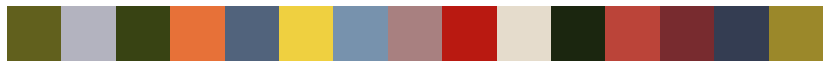

In [8]:
plt.figure(figsize = (N_CLUSTERS, 1))
plt.axis(False)
plt.grid(False)
plt.imshow([colors]);

In [9]:
pred = km.predict(df)
pred

array([10, 10, 10, ..., 10, 10, 10])

In [10]:
_, cluster_counts = np.unique(pred, return_counts = True)
cluster_counts

array([39335, 37488, 69445, 23809, 30858, 24233, 36141, 23580, 12364,
       16595, 91107, 30500, 28637, 32863, 21445], dtype=int64)

In [11]:
cluster_ids = cluster_counts.argsort()
cluster_counts.sort()
cluster_ids, cluster_counts

(array([ 8,  9, 14,  7,  3,  5, 12, 11,  4, 13,  6,  1,  0,  2, 10],
       dtype=int64),
 array([12364, 16595, 21445, 23580, 23809, 24233, 28637, 30500, 30858,
        32863, 36141, 37488, 39335, 69445, 91107], dtype=int64))

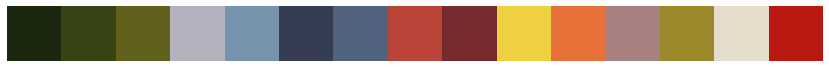

In [12]:
plt.figure(figsize = (N_CLUSTERS, 1))
plt.axis(False)
plt.grid(False)
plt.imshow([colors[cluster_ids[::-1]]]);

In [13]:
reshaped_pred = pred.reshape(image.shape[:2])
reshaped_pred

array([[10, 10, 10, ..., 13, 13, 13],
       [10, 10, 10, ..., 13, 13, 13],
       [10, 10, 10, ..., 13, 13, 13],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]])

In [14]:
all_imgs = np.zeros((N_CLUSTERS + 1, *image.shape), dtype='uint8')
new_img = np.zeros(image.shape, dtype='uint8')
new_img[:] = 255
all_imgs[0] = new_img

for i in range(N_CLUSTERS):
    new_img = new_img.copy()
    new_img[np.where(reshaped_pred == cluster_ids[-(i + 1)])] = colors[cluster_ids[-(i + 1)]]
    all_imgs[i + 1] = new_img

Image.fromarray(all_imgs[N_CLUSTERS], 'RGB').save(OUTPUT_IMAGE_PATH)
display.Image(url = OUTPUT_IMAGE_PATH, height = 500)

In [15]:
imgs = []
for i in range(N_CLUSTERS + 1):
    img = Image.fromarray(all_imgs[i], 'RGB')
    imgs.append(img)

for i in range(FINAL_FRAME_REPEAT):
    imgs.append(imgs[N_CLUSTERS])

if BOOMERANG:
    for i in range(N_CLUSTERS - 1, 0, -1):
        imgs.append(imgs[i])

In [16]:
imgs[0].save(
    OUTPUT_GIF_PATH, 
    save_all = True, 
    append_images = imgs[1:], 
    optimize = False, 
    duration = DURATION_PER_FRAME, 
    loop = LOOP_COUNT
)

In [17]:
display.Image(url = OUTPUT_GIF_PATH, height = 500)